## Importando as bibliotecas

In [ ]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Coletando dados

In [ ]:
custo_diaria = pd.read_csv('/content/custo_diaria.csv', sep=';')

## Analisando os dados coletados

In [ ]:
# visualizando arquivos da base de dados
custo_diaria.head()

,qtd_pessoas,valor_diaria
0,1,150
1,4,385
2,6,499
3,10,680
4,13,735


In [ ]:
# gerando algumas estatísticas da base de dados
custo_diaria.describe()

,qtd_pessoas,valor_diaria
count,15.000000,15.000000
mean,24.533333,1348.600000
std,16.796542,823.087116
min,1.000000,150.000000
25%,11.500000,707.500000
50%,22.000000,1075.000000
75%,41.000000,2044.500000
max,50.000000,2680.000000


In [ ]:
# verificando se existe algum valor nulo ou ausente
custo_diaria.isna().sum()

qtd_pessoas     0
valor_diaria    0
dtype: int64

In [ ]:
# verificando informações da base de dados
custo_diaria.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   qtd_pessoas   15 non-null     int64
 1   valor_diaria  15 non-null     int64
dtypes: int64(2)
memory usage: 368.0 bytes


## Análise de correlação entre as variáveis

In [ ]:
custo_diaria.corr()

,qtd_pessoas,valor_diaria
qtd_pessoas,1.000000,0.992069
valor_diaria,0.992069,1.000000


## Análise gráfica da correlação entre as variáveis

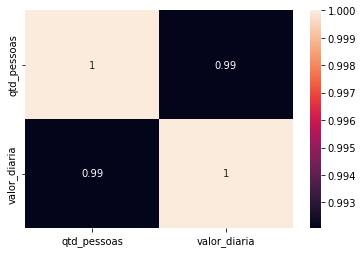

In [ ]:
correlacao = custo_diaria.corr()
sns.heatmap(correlacao, annot = True)

# Tratamento de dados

## Criando variável independente - X

In [ ]:
X = custo_diaria.iloc[:, 0].values
print(X)

[ 1  4  6 10 13 15 18 22 25 30 40 42 45 47 50]


## Criando variável dependente - y

In [ ]:
y = custo_diaria.iloc[:, 1].values
print(y)

[ 150  385  499  680  735  859  989 1075 1500 1850 2000 2089 2250 2488
 2680]


## Verificando tipo de variáveis

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
X.shape

(15,)

## Transformando array em matriz

In [ ]:
X = X.reshape(-1, 1)

In [ ]:
X.shape

(15, 1)

# Criando modelo de Machine Learning - Regressão Linear

In [ ]:
from sklearn.linear_model import LinearRegression
predicao_custo_diaria = LinearRegression()

In [ ]:
type(predicao_custo_diaria)

sklearn.linear_model._base.LinearRegression

## Realizando o treinamento do modelo

In [ ]:
predicao_custo_diaria.fit(X, y)

LinearRegression()

## Calculando a constante alfa - intercept

In [ ]:
predicao_custo_diaria.intercept_

155.91874556932066

## Calculando o coeficiente angular (a) da reta - coef

In [ ]:
predicao_custo_diaria.coef_

array([48.61472504])

## Realizando a predição dos valores das diárias

In [ ]:
previsao_valores = predicao_custo_diaria.predict(X)

In [ ]:
# Visualização das previsões para cada nª de pessoas
previsao_valores

array([ 204.53347061,  350.37764575,  447.60709584,  642.06599602,
        787.91017115,  885.13962124, 1030.98379637, 1225.44269655,
       1371.28687169, 1614.36049691, 2100.50774736, 2197.73719745,
       2343.58137258, 2440.81082267, 2586.65499781])

# Visualizando no gráfico as disposições dos dados

## Gerando visualização gráfica dos dados

In [ ]:
# Gráfico 1
grafico = px.scatter(x = X.ravel(), y = y)
grafico.show()

In [ ]:
# Gráfico 2
grafico = px.scatter(x = X.ravel(), y = y)
grafico.add_scatter(x = X.ravel(), y = previsao_valores, name = 'previsões')
grafico.show()

### Calculando o valor da diária de acordo com a Equação Linear

Yi = a + b * Xi + Ei




*   Yi = previsão do preço da diária
*   a = constante
*   b = coeficiente de inclinação da reta
*   Xi = número de pessoas
*   Ei = erro






In [ ]:
# Verificando os valores de uma determinada previsão baseada na quantidade de pessoas
alfa = predicao_custo_diaria.intercept_
beta = predicao_custo_diaria.coef_
Xi = 4

alfa + beta * Xi

array([350.37764575])

### Calculando o valor da diária através da função predict do modelo

In [ ]:
# Verificando de modo direto
predicao_custo_diaria.predict([[8]])

array([544.83654593])

### Avaliação do modelo

In [ ]:
# Calculando a acurácia do modelo
predicao_custo_diaria.score(X, y)

0.984200996064679

### Calculando o Mean absolut error

In [ ]:
mean_absolute_error(y, previsao_valores)

83.84480977618742

### Calculando o Mean squared error

In [ ]:
MSE = mean_squared_error(y, previsao_valores)
print(MSE)

9989.829839426571


### Calculando o Root Mean squared error

In [ ]:
np.sqrt(MSE)

99.9491362615334